# Qiskit: An introductory guide 

The following is a short essay on Qiskit, which is an open source framework for quantum computing. The intended use of this essay will be to provide a short introduction on Qiskit, it's uses and advantages over other such applications as well as providing short tutorials on selected topics within the domain of quantum computing. It should be noted that the online documentation (https://qiskit.org/documentation/) and textbook (https://qiskit.org/textbook/preface.html) are also great tools for learning qiskit. 

## Installation

Qiskit works best through Python, which also allows it to be used on most operating systems. It is recommended to install Qiskit through the Anaconda distribution of python as this allows for better management of the (virtual) environment you are working in. The main advantage of using Qiskit within its own seperate virtual environment is that it allows the user to manage the packages within that environment as some may not be compatible or work with Qiskit. You can also set up and install Qiskit through about python distributions such as PyCharm, IDLE or VSCode, however this tutorial will be for Anaconda (and Anaconda is recommended). 

Once you have Anaconda installed (https://docs.anaconda.com/anaconda/install/) you can open up the anaconda terminal and create a new virtual environment from which to install Qiskit. This is all described on the installation page on the Qiskit website, however, it is important to note that I could not run Qiskit on python 3.8+, therefore I installed Qiskit on Python 3.7. You can change the version of Python with which you install Qiskit by changing the environment creation command (conda create -n name_of_my_env python=3.7).



![image](resources/img1.png)
To open the Anaconda terminal navigate to your environment either root or the one you have created for Qiskit. This image should help

## Advantages and usage of Qiskit

There are many Quantum Computing languages and coding tools out there (Such as QuTiP, a Quantum Toolbox mostly used for simulating open quantum systems), however, Qiskit provides a distinct advantage in that it is well documented, provides many tutorials and has ease of use. Within the framework of Qiskit, the user is able to efficiently create and simulation Quantum circuits as well as vizualize key theorems and problems which are often presented in such a manner that it is often hard to understand the concept being taught. Qiskit provides a complimentary learning tool that (in my opinion) is best used alongside studies in Quantum Computing and Quantum Information. 

Qiskit also allows the user to execute code on actual quantum computer and hardware through integration with IBM Experience and their quantum computers. This is incredibly beneficial for someone learning abotu Quantum Computing because it gives them a chance to see real world applications of their work which is something that is rarely possible for such theoretical studies. It is interesting to apply the knowledge and skills gained to see outcomes run on quantum hardware. 

## Using Qiskit for Quantum Computing

In [92]:
from qiskit import *
from qiskit.visualization import plot_bloch_vector #https://qiskit.org/documentation/stubs/qiskit.visualization.plot_bloch_vector.html
import numpy as np
%matplotlib inline

### Single Qubit States 

The best way to use Qiskit for qubits is to use the vizualization package of qiskit. As we know a qubit can be represented by the bloch sphere. The function plot_bloch_vector from Qiskit vizualization allows us to see this, all it requires, as an input is the array of three elements, which can be given in cartesian (x,y,z) or spherical coordinates (r, $\theta$, $\phi$). As an example, imagine we have a general qubit state 
$$ \vert \psi \rangle  = \cos \frac{\theta}{2} \vert 0 \rangle + e^{i \phi} \sin \frac{\theta}{2} \vert 1 \rangle $$
In the state $\vert + \rangle$ where $\theta = \pi /2$ and we have $\phi = 0$. 

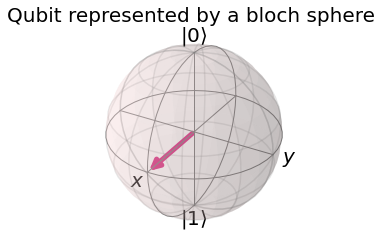

In [77]:
plot_bloch_vector([1,0,0], title="Qubit represented by a bloch sphere", figsize=[3,3])

As you can see the vizualization plots the vector on the bloch sphere. Usually, a qubit on the bloch sphere is represented on the surface for a pure state. Qiskit makes this easier to see by representing the qubit state as a vector. 

We can create a simple single qubit quantum circuit in Qiskit quite easily 

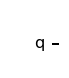

In [84]:
from qiskit import QuantumCircuit

circ = QuantumCircuit(1)
circ.draw('mpl')

As we see the circuit does not contain anything other than the single qubit line. To see the state of the qubit we can use the statevector part of Qiskit

In [86]:
from qiskit.quantum_info import Statevector

sv = Statevector.from_label('0')
sv.data #or sv

array([1.+0.j, 0.+0.j])

So we see that the qubit is in the state 
$$\vert0\rangle = \begin{bmatrix}1\\0\end{bmatrix}$$
The qubit can now be evolved through the circuit we just created. 

In [88]:
new_sv = sv.evolve(circ)
new_sv

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))

Clearly, the circuit we made has no effect on the state of the qubit as there are no gates. A good vizualization of this is also provided in Qiskit


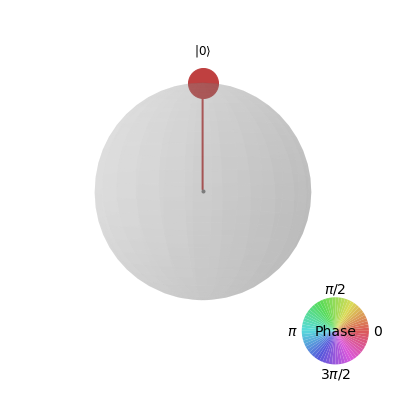

In [93]:
from qiskit.visualization import plot_state_qsphere
plot_state_qsphere(sv.data)


We can see this more clearly by using a Pauli X gate, flipping the qubit state

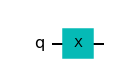

In [99]:
mycircuit = QuantumCircuit(1)
mycircuit.x(0)

mycircuit.draw('mpl')

In [100]:
sv = Statevector.from_label('0')
new_sv = sv.evolve(mycircuit)
new_sv

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))

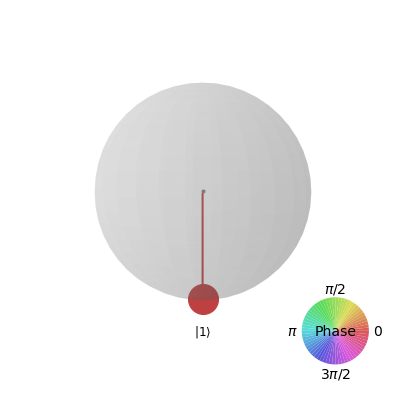

In [101]:
plot_state_qsphere(new_sv.data)

As you can see by the vizualization, we are flipping the state of the qubit from $\vert0\rangle$ to $\vert1\rangle$ through the use of an X gate. 

Lets take this further and introduce multiple qubit systems in Qiskit, through the circuit provided in Exercise 4.20 in N&C

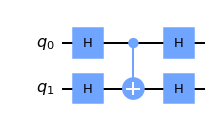

In [103]:
#Exercise 4.20 N&C
circ1 = QuantumCircuit(2) 
# Add a H gate on qubit 0 and qubit 1 first
circ1.h(0)
circ1.h(1)
# Add a CNOT gate on control qubit 0 and target qubit 1
circ1.cx(0, 1)
# Add a H gate on the qubit 0 and qubit 1 AFTER the CNOT gate
circ1.h(0)
circ1.h(1)
circ1.draw('mpl') #This prints the circuit

This as shown in Nielsen and Chaung is the same as a CNOT gate with the state flipped 

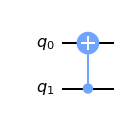

In [104]:
circ2 = QuantumCircuit(2) 
circ2.cx(1,0)
circ2.draw('mpl') 

Now, seeing how this changes the state vector.

In [111]:
sv = Statevector.from_label('++') #working in +- basis states
new_sv = sv.evolve(circ1)
new_sv

Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],
            dims=(2, 2))

In [108]:
sv = Statevector.from_label('++')
new_sv = sv.evolve(circ2)
new_sv

Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],
            dims=(2, 2))

In the basis state 
$$ \vert \pm \rangle = ( \vert 0 \rangle \pm \vert 1 \rangle ) / \sqrt{2} $$
We have verified that the 2 circuits are identical. We simple manipulation of the code we can verify the effect of a CNOT with the first qubit as control and second qubit as target as in the exercise

A very useful trick when calculating or verifying a quantum circuit is to split the circuit up into its operations. Qiskit allows for this. As an example, lets look at Exercise 6.6 from Nielsen and Chaung which is to verify that the gates perform the conditional phase shift operation $2 \vert 00 \rangle \langle 00 \vert - I$ up to a certain global phase factor. 

The circuit is given by 

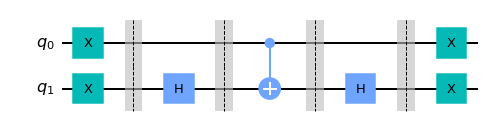

In [30]:
circ = QuantumCircuit(2) 
# Add a H gate on qubit 0 and qubit 1 first
circ.x(0)
circ.x(1)

circ.barrier(range(2))

circ.h(1)

circ.barrier(range(2))

circ.cx(0, 1)

circ.barrier(range(2))

circ.h(1)
circ.barrier(range(2))
circ.x(0)
circ.x(1)

circ.draw('mpl') #This prints the circuit

## IBM Experience

One of the greatest advantages QIskit has is its integration the IBM Quantum Lab. This integration is such that it allows you to run all of the given Jupyter Notebooks on the Qiskit website on the IBM quantum computing website (https://quantum-computing.ibm.com/jupyter). The website allows you to drag & drop circuit development without any coding and built, execite and alayze quantum circuits through the cloud using qiskit. 

To take advantage of these you need to create an IBM Quantum Experience account. From there you can directly code in Qiskit, no installation required. 

To use IBMQ from within your own jupyter notebook you can follow the code below. Note that the code has not actually been run. To use the `IBMQ.load_account()` you will need to save your IBMQ account to disk through the IBQM website and online tool, more information can be found here (https://quantum-computing.ibm.com/docs/manage/account/ibmq). 

In [ ]:
IBMQ.load_account()

provider = IBMQ.get_provider(hub='ibm-q')

backend = provider.get_backend('ibmq_16_melbourne')

import qiskit.tools.jupyter
%matplotlib inline

backend

## Quantum Algorithms 

Below I worked through a simple example of the Quantum Phase Estimation algorithm which was covered briefly in Nielsen & Chaung. I chose this algorithm because I found the explaination in the textbook to be lacking and this is one of the best examples to show the uses of Qiskit for learning. This example also shows how to use Qiskit to simulate circuits you have made. 

### Quantum Phase Estimation 

![image](resources/PhaseCircuit.png)
Reference: https://en.wikipedia.org/wiki/Quantum_phase_estimation_algorithm
(The figure from N&C isn't as descriptive)

The goal of a Quantum Phase Estimation algorithm is to determine the phase ($\phi$) of a unitary operator with eigenvector $\vert u \rangle$ and eigenvalue $e^{2 \pi i \phi}$, i.e 
$$U \vert \psi \rangle=e^{2 \pi i \phi} \vert \psi \rangle$$
This isn't expanded much in the Nislen & Chaung book, however there are various resources online from which I will try and implement Qiskit for. 

The algorithm works by first, creating a superposition of all $2^n$ states in a computational basis on $n$ measurement qubits. This is done by applying a Hadamard gate to each qubit. We also want to intialize the target qubits into the eigenstate $\vert \psi \rangle$ so that it matches the unitary operator. 
Then we apply the unitary operator (of various powers) onto the target qubits and then apply the inverse Quantum Fourier transform on the $n$ measurement qubits, finally, measuring the $n$ qubits and estimating the phase. 
These steps are given in the diagram above. 

We can implement this algorithm through Qiskit for the unitary operator 
$$ U = \begin{bmatrix} 1 & 0 \\ 0 & e^{2 \pi i \theta} \end{bmatrix} $$
which gives a nice eigenstate of $\vert1\rangle$ so that 
$$ U \vert 1 \rangle = e^{2 \pi i \theta} \vert 1 \rangle  $$
Let us estimate the phase for 5 qubits ($n=5$) 

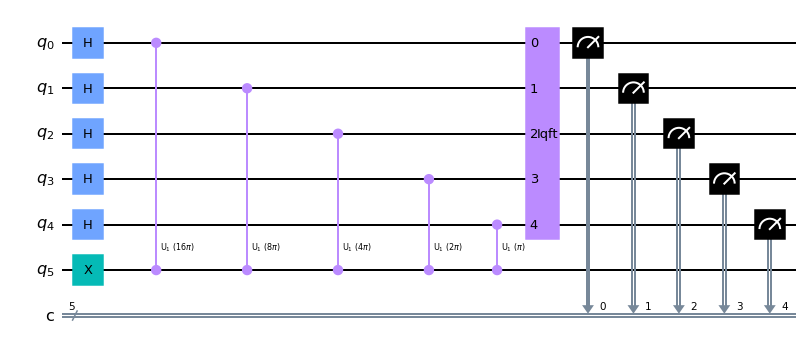

In [141]:
import numpy as np
from qiskit.circuit.library import QFT
from qiskit import QuantumCircuit

#initalizing qubits by applying hadamard
def initialize_qubits(circuit, measurement_qubits, target_qubit):
    circuit.h(measurement_qubits)
    circuit.x(target_qubit)

    
#Implementing unitary operation     
def unitary_operator_exponent(circuit, control_qubit, target_qubit, theta, exponent):
    circuit.cu1(2*np.pi*theta*exponent, control_qubit, target_qubit)

    
    
#cu1 gate for the controlled U1 gate.

#Implementing inverse fourier transfrom from qiskit circuit library
def iqft(circuit, measurement_qubits, n):
    circuit.append(QFT(n).inverse(), measurement_qubits)

def qpe_program(n, theta):
    qc = QuantumCircuit(n+1, n) #n+1 qubits here as we have n measurement and 1 target
    initialize_qubits(qc, range(n), n)
    for x in range(n): #the unitary gates are applied ins sequence
        exponent = 2**(n-x-1)
        unitary_operator_exponent(qc, x, n, theta, exponent)
    iqft(qc, range(n), n)
    
    # Measure all qubits
    qc.measure(range(n), range(n))
  
    return qc

n = 5; theta = 0.5 #as an example
mycircuit = qpe_program(n, theta)
mycircuit.draw('mpl')   
   

The above cell shows the circuit implementation of the Quantum Phase Estimation, but to actually get tangible results we need to introduce the use of `Aer`. This is a high performance simulator, used to run through the Quantum Circuit we have just built. 

To simulate a circuit you first define the simulator (Aer) and the backend with which the simulator works from (other examples include `statevector.simulator` which displays the wavefunction). To simulate, use the in built Qiskit execute for the circuit. In the case below I specified getting the counts as the execute function gives a wide array of outputted data. 

The measured counts is used to determine the phase by finding the outcome with largest probability then dividing by $2^n$ as in the algorithm. Note that I used `prob[0][::-1]` to reverse the order so that we get the bit with the highest outcome probability. 

In [136]:
from qiskit import Aer, execute
exe = execute(mycircuit, backend=simulator).result()
sim= exe.get_counts(mycircuit)
prob = max(sim.items())
measured_theta = int(prob[0][::-1], 2)/2**n 
print("Using %d qubits with theta = %.2f, measured_theta = %.2f." % (n, theta, measured_theta))


Using 5 qubits with theta = 0.50, measured_theta = 0.50.


## Conclusion

In this very brief and introductory notebook on Qiskit I have shown how to build Quantum Circuits from gates and qubits to simulating them in order to run a Quantum Algorithm. One of the best things about Qiskit is its amazing libary of documentation and helpful webpages. I hope that you found the notebook style implementation of this essay useful, as I do believe the best way to learn and figure out Qiskit is to try it yourself.


## References

IBM Quantum Experience - https://quantum-computing.ibm.com/

A tutorial series Using Qiskit - https://arxiv.org/pdf/1903.04359.pdf (uses a slightly older version of Qiskit)

Qiskit Online Textbook - https://qiskit.org/textbook

Qiskit Documentation - https://qiskit.org/documentation

Nielsen & Chaung: Quantum Computation and Quantum Information
